In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import time
import csv
import json
from scipy.misc import imread
from scipy.misc import imresize

In [2]:
#load gold labels
with open('../gt_test.csv', 'rb') as f:
    reader = csv.reader(f)
    gold_choices = list(reader)
predicted_sorted = np.load('combined_results/sorted_predicted_choices_100_l1.npy')

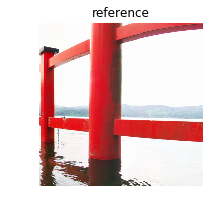

ranked predictions


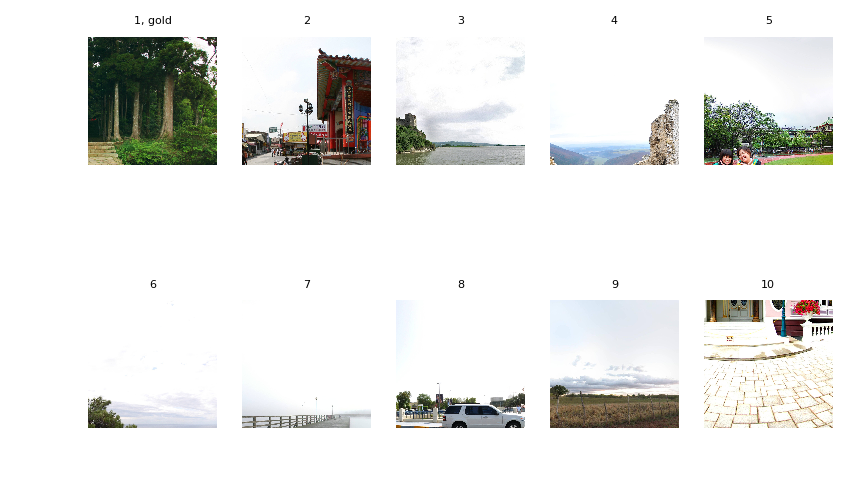

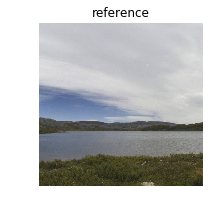

ranked predictions


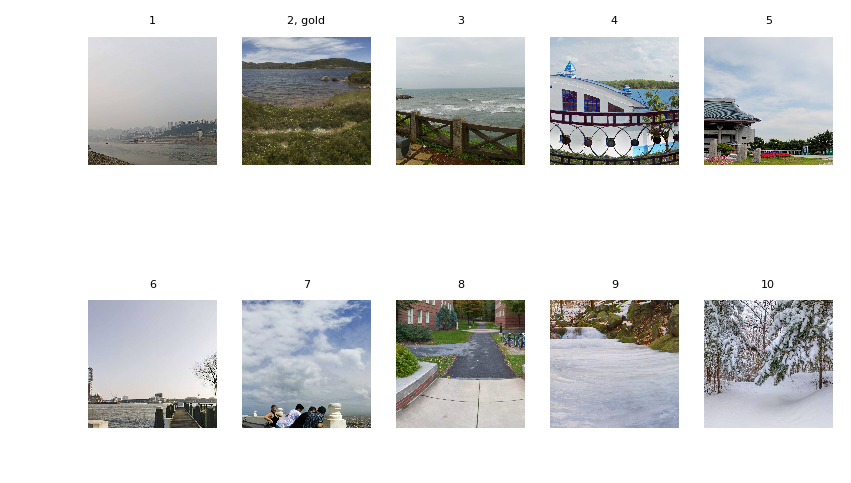

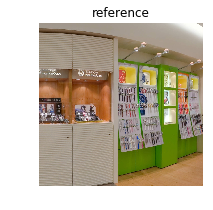

ranked predictions


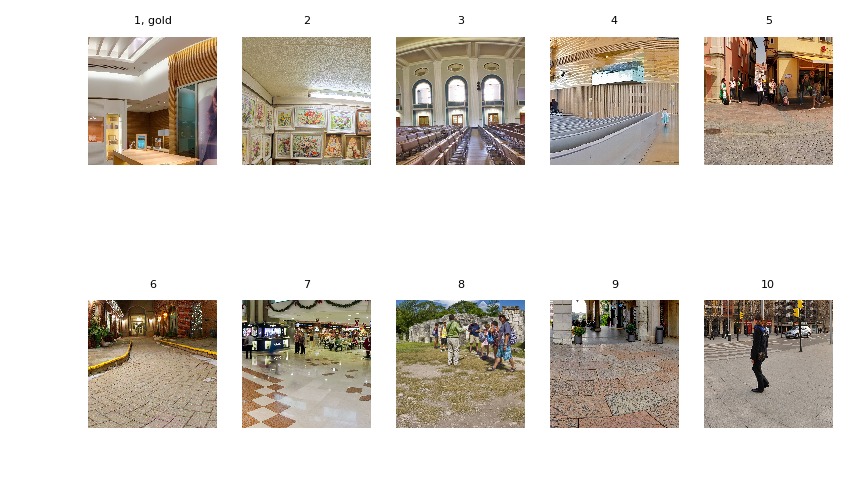

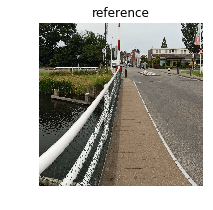

ranked predictions


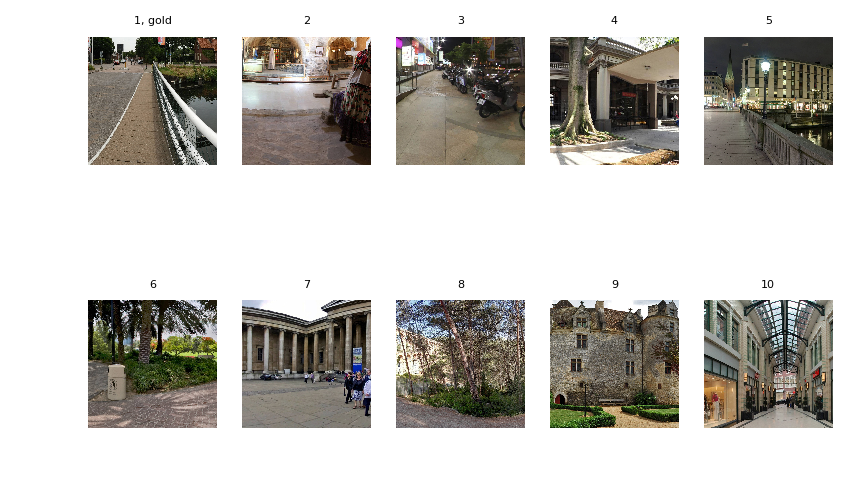

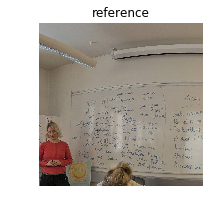

ranked predictions


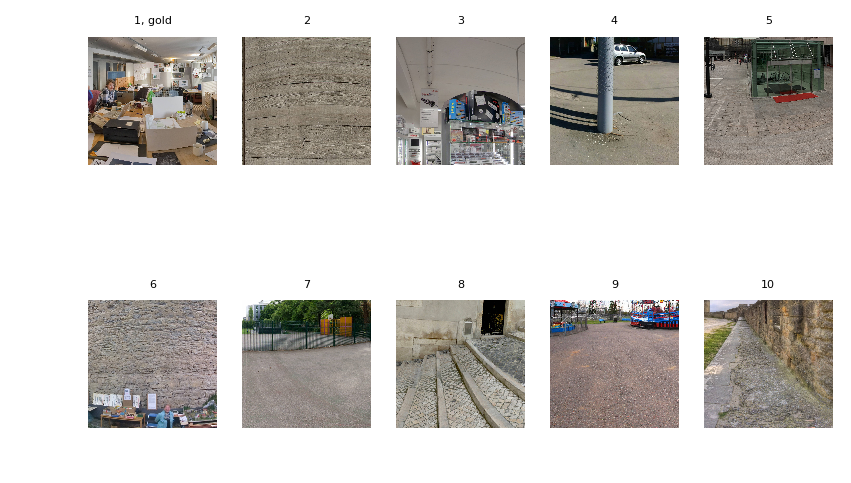

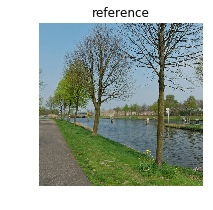

ranked predictions


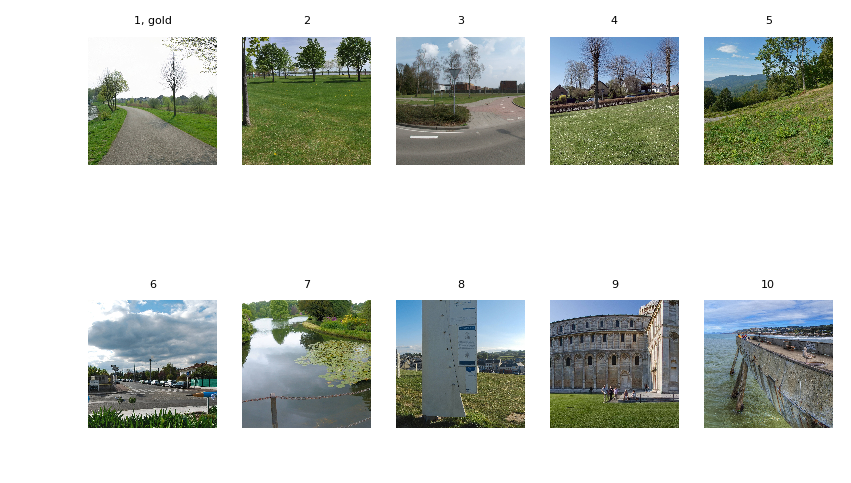

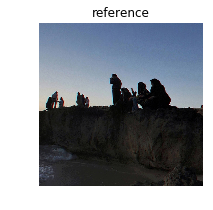

ranked predictions


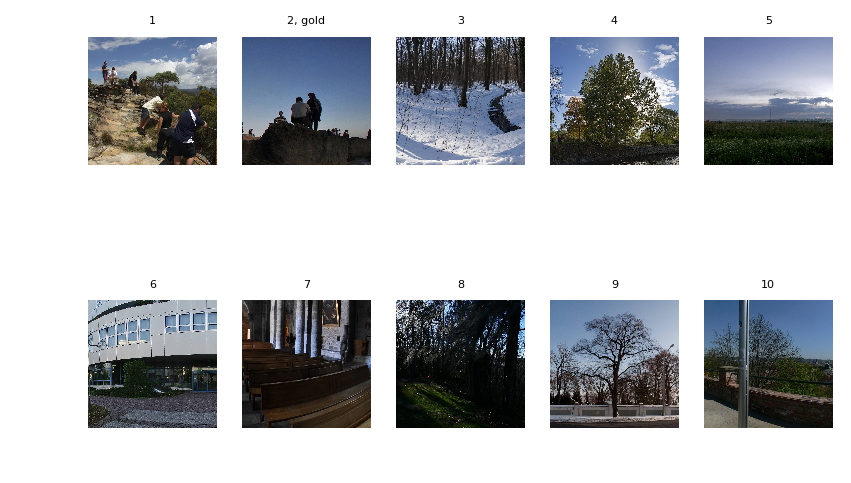

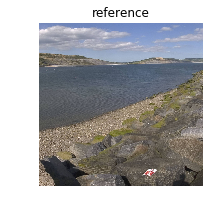

ranked predictions


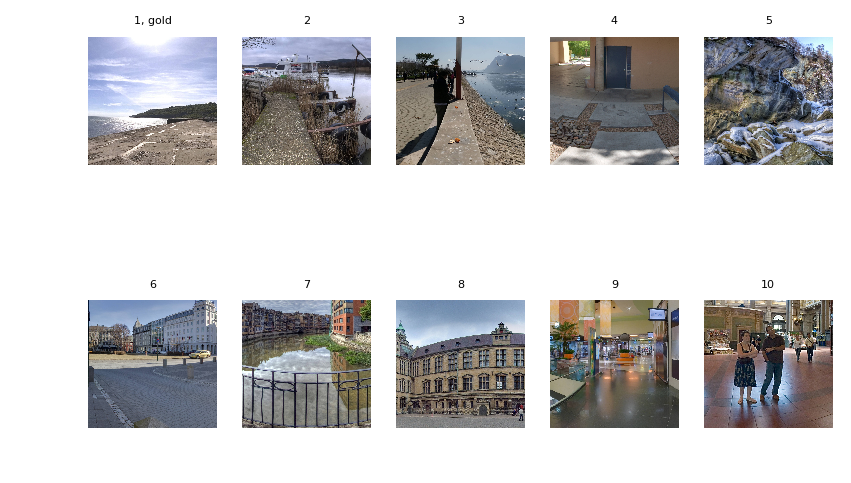

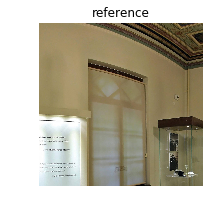

ranked predictions


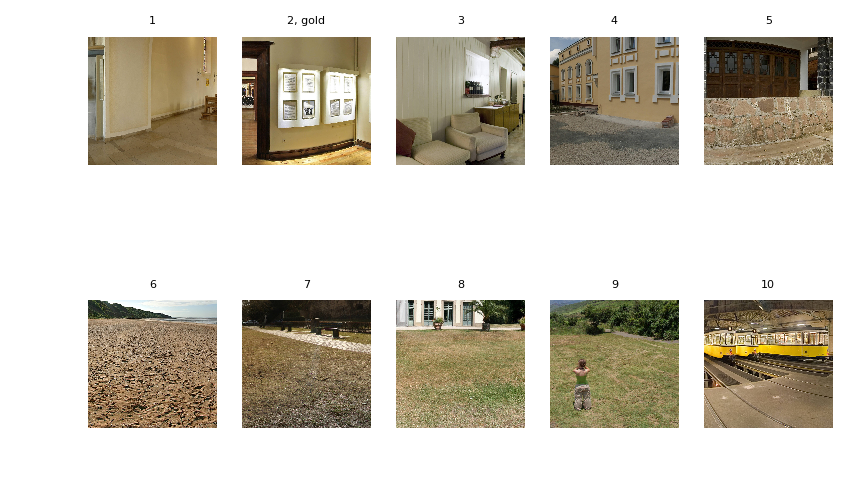

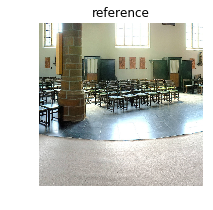

ranked predictions


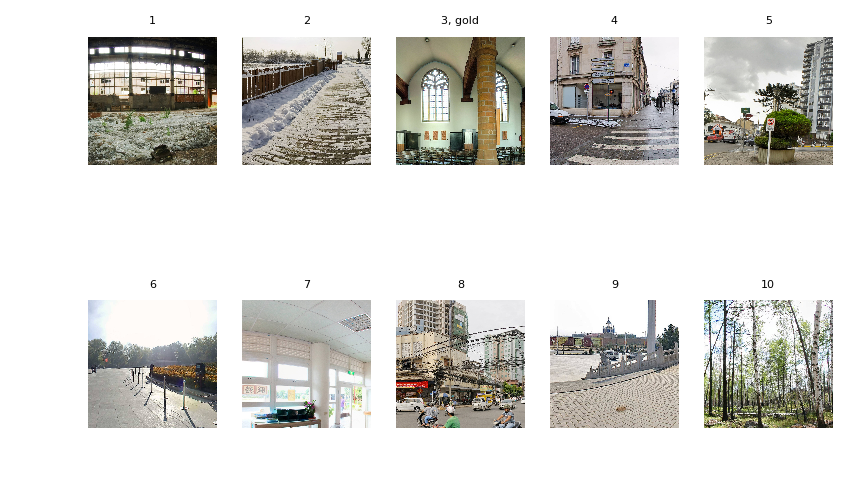

ranked predictions


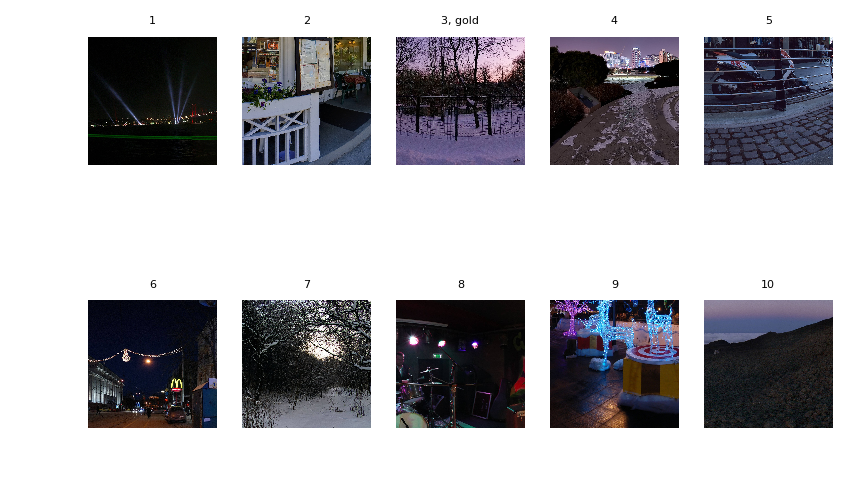

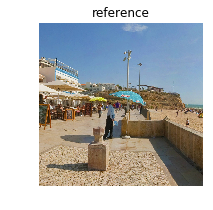

ranked predictions


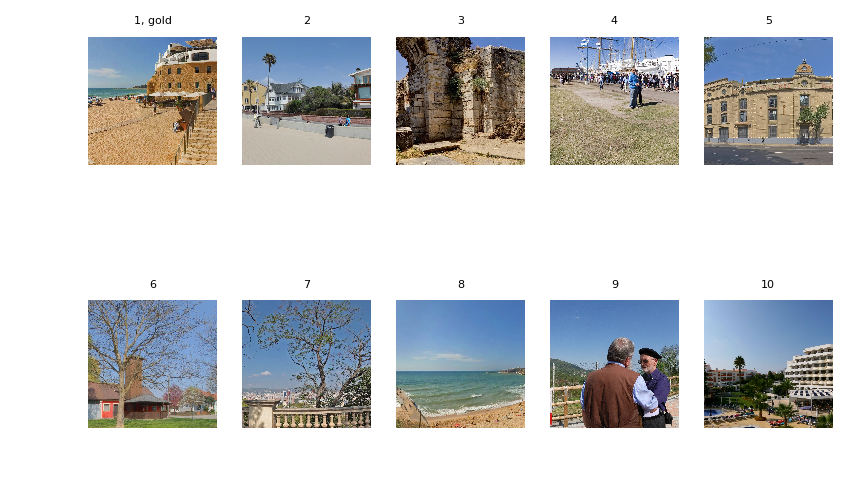

ranked predictions


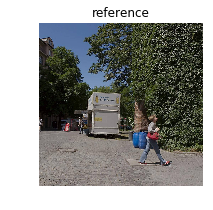

ranked predictions


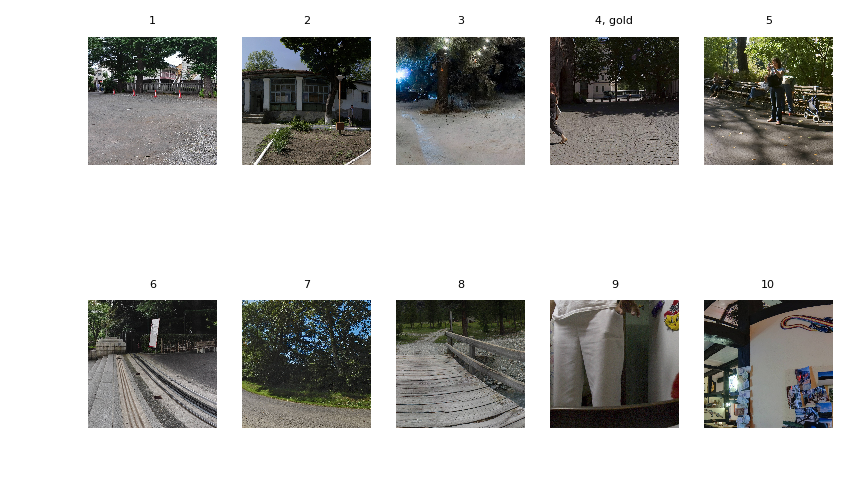

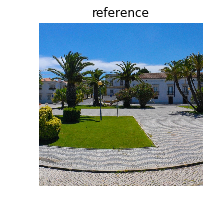

ranked predictions


In [3]:
PATH = '/mnt/nfs/scratch1/gluo/SUN360/HalfHalf/'
num_examples = 999 #change this to 17k

sampled_examples = np.random.choice(num_examples, 15 ,replace=False)

count = 0
folders = []
acc = 0
for direct in sampled_examples:
    img_json = '../task_test/'+'%09d' % direct + '.json'
    with open(img_json) as f:
        img_list = json.loads(f.read())
    img_address = PATH + 'IMGs/' + img_list[0]
    command = "sshpass -p \'PASSWORD\' scp cmanjesh@gypsum.cs.umass.edu:"+img_address+" "+img_list[0].split('/')[0]+"_"+img_list[0].split('/')[1]
    os.system(command)
    plt.figure(figsize=(3,3))
    plt.imshow(imread(img_list[0].split('/')[0]+"_"+img_list[0].split('/')[1]))
    os.system('rm '+img_list[0].split('/')[0]+"_"+img_list[0].split('/')[1])
    plt.title('reference')
    plt.axis('off')
    plt.show()
    
    fig, ax = plt.subplots(nrows=2, ncols=5, dpi=160)
    choice = 0
    gold = int(gold_choices[direct][1])
    predicted_direct = predicted_sorted[direct,:]
    #if(np.any(predicted_direct[0:3]==gold)):
    if(predicted_direct[0]==gold):
        acc += 1
    counter = 1
    print 'ranked predictions'
    for row in ax:
        for col in row:
            choice_current = img_list[1][int(predicted_direct[choice])]
            choice_img = PATH + 'IMGs/' +choice_current
            command = "sshpass -p \'Cheman94*\' scp cmanjesh@gypsum.cs.umass.edu:"+choice_img+" "+choice_current.split('/')[0]+"_"+choice_current.split('/')[1]
            os.system(command)
            col.imshow(imread(choice_current.split('/')[0]+"_"+choice_current.split('/')[1]))
            os.system('rm '+choice_current.split('/')[0]+"_"+choice_current.split('/')[1])
            col.set_title(str(counter), fontsize=5)
            if predicted_direct[choice] == gold:
                col.set_title(str(counter)+', gold', fontsize=5)
            col.axis('off')
            choice += 1
            counter += 1 
    plt.show()